## CHALLENGE 1
Convert Turnstile CSV data into Python dictionary ("turnstileDict")

In [88]:
import csv
import pprint

In [89]:
turnstileDict = {}

In [90]:
with open("turnstile_160702.txt", "r") as csvfile:
    reader = csv.reader(csvfile)
    next(reader, None)
    for item in reader:
        turnstileDict.setdefault(tuple(item[:4]),[]).append(item[5:])

In [38]:
#  PRINTER (5 entries)

i = 0
for key,value in turnstileDict.items():
    if i>4:
        break
    pprint.pprint (key)
    pprint.pprint (value)
    i += 1

('N134', 'R385', '00-00-00', 'ROCKAWAY BLVD')
[['IND',
  '06/25/2016',
  '01:00:00',
  'REGULAR',
  '0007354996',
  '0002916916                                          '],
 ['IND',
  '06/25/2016',
  '05:00:00',
  'REGULAR',
  '0007355072',
  '0002916945                                          '],
 ['IND',
  '06/25/2016',
  '09:00:00',
  'REGULAR',
  '0007355340',
  '0002917003                                          '],
 ['IND',
  '06/25/2016',
  '13:00:00',
  'REGULAR',
  '0007355570',
  '0002917089                                          '],
 ['IND',
  '06/25/2016',
  '17:00:00',
  'REGULAR',
  '0007355871',
  '0002917171                                          '],
 ['IND',
  '06/25/2016',
  '21:00:00',
  'REGULAR',
  '0007356088',
  '0002917301                                          '],
 ['IND',
  '06/26/2016',
  '01:00:00',
  'REGULAR',
  '0007356185',
  '0002917351                                          '],
 ['IND',
  '06/26/2016',
  '05:00:00',
  'REGULAR',
  '0007356209

## CHALLENGE 2:
Convert turnstileDict into time series dictionary ("timeDict")

In [91]:
import datetime

In [92]:
timeDict = {}

In [93]:
for key in turnstileDict.keys():
    newList = [[datetime.datetime.strptime(str(x + " " + y), "%m/%d/%Y %H:%M:%S"),int(z)] for [_,x,y,_,z,_] in turnstileDict[key]]
    timeDict[key] = newList

In [94]:
#  PRINTER (5 entries)

i = 0
for key,value in timeDict.items():
    if i>4:
        break
    pprint.pprint (key)
    pprint.pprint (value)
    i += 1

('N134', 'R385', '00-00-00', 'ROCKAWAY BLVD')
[[datetime.datetime(2016, 6, 25, 1, 0), 7354996],
 [datetime.datetime(2016, 6, 25, 5, 0), 7355072],
 [datetime.datetime(2016, 6, 25, 9, 0), 7355340],
 [datetime.datetime(2016, 6, 25, 13, 0), 7355570],
 [datetime.datetime(2016, 6, 25, 17, 0), 7355871],
 [datetime.datetime(2016, 6, 25, 21, 0), 7356088],
 [datetime.datetime(2016, 6, 26, 1, 0), 7356185],
 [datetime.datetime(2016, 6, 26, 5, 0), 7356209],
 [datetime.datetime(2016, 6, 26, 9, 0), 7356331],
 [datetime.datetime(2016, 6, 26, 13, 0), 7356509],
 [datetime.datetime(2016, 6, 26, 17, 0), 7356676],
 [datetime.datetime(2016, 6, 26, 21, 0), 7356846],
 [datetime.datetime(2016, 6, 27, 1, 0), 7356955],
 [datetime.datetime(2016, 6, 27, 5, 0), 7356978],
 [datetime.datetime(2016, 6, 27, 9, 0), 7357599],
 [datetime.datetime(2016, 6, 27, 13, 0), 7357903],
 [datetime.datetime(2016, 6, 27, 17, 0), 7358176],
 [datetime.datetime(2016, 6, 27, 21, 0), 7358465],
 [datetime.datetime(2016, 6, 28, 1, 0), 73585

## CHALLENGE 3
Create dictionary containing total daily entries per turnstile per station ("dailyEntryDict")

In [95]:
dailyEntryDict = {}
dateList = []

In [96]:
for key in timeDict:
    dailyEntryDict[key] = []
    dateList = []
    for x in timeDict[key]:
        if dateList == []:
            dateList.append(x[0].date())
            
        if x[0].date() not in dateList:
            dailyEntryDict[key].append([dateList[0], max(dateList[1:]) - min(dateList[1:])])
            dateList = [x[0].date(), x[1]]
        else:
            dateList.append(x[1])
            
        if timeDict[key].index(x) == len(timeDict[key])-1:
            dailyEntryDict[key].append([dateList[0], max(dateList[1:]) - min(dateList[1:])])

In [37]:
#  PRINTER (5 entries)

i = 0
for key,value in dailyEntryDict.items():
    if i>4:
        break
    pprint.pprint (key)
    pprint.pprint (value)
    i += 1

('N134', 'R385', '00-00-00', 'ROCKAWAY BLVD')
[[datetime.date(2016, 6, 25), 1092],
 [datetime.date(2016, 6, 26), 661],
 [datetime.date(2016, 6, 27), 1510],
 [datetime.date(2016, 6, 28), 1457],
 [datetime.date(2016, 6, 29), 1440],
 [datetime.date(2016, 6, 30), 1361],
 [datetime.date(2016, 7, 1), 1243]]
('R190', 'R038', '00-00-02', '215 ST')
[[datetime.date(2016, 6, 25), 308],
 [datetime.date(2016, 6, 26), 283],
 [datetime.date(2016, 6, 27), 619],
 [datetime.date(2016, 6, 28), 620],
 [datetime.date(2016, 6, 29), 589],
 [datetime.date(2016, 6, 30), 530],
 [datetime.date(2016, 7, 1), 489]]
('PTH08', 'R540', '00-01-06', 'PATH WTC')
[[datetime.date(2016, 6, 25), 69],
 [datetime.date(2016, 6, 26), 0],
 [datetime.date(2016, 6, 27), 0]]
('R159', 'R164', '01-06-00', '66 ST-LINCOLN')
[[datetime.date(2016, 6, 25), 40],
 [datetime.date(2016, 6, 26), 41],
 [datetime.date(2016, 6, 27), 55],
 [datetime.date(2016, 6, 28), 43],
 [datetime.date(2016, 6, 29), 43],
 [datetime.date(2016, 6, 30), 53],
 [date

## CHALLENGE 4
Plot daily time series per turnstile

In [97]:
%matplotlib inline

In [98]:
import matplotlib.pyplot as plt

In [99]:
print dailyEntryDict.values()[0]

[[datetime.date(2016, 6, 25), 1092], [datetime.date(2016, 6, 26), 661], [datetime.date(2016, 6, 27), 1510], [datetime.date(2016, 6, 28), 1457], [datetime.date(2016, 6, 29), 1440], [datetime.date(2016, 6, 30), 1361], [datetime.date(2016, 7, 1), 1243]]


('N134', 'R385', '00-00-00', 'ROCKAWAY BLVD')
[[datetime.date(2016, 6, 25), 1092],
 [datetime.date(2016, 6, 26), 661],
 [datetime.date(2016, 6, 27), 1510],
 [datetime.date(2016, 6, 28), 1457],
 [datetime.date(2016, 6, 29), 1440],
 [datetime.date(2016, 6, 30), 1361],
 [datetime.date(2016, 7, 1), 1243]]


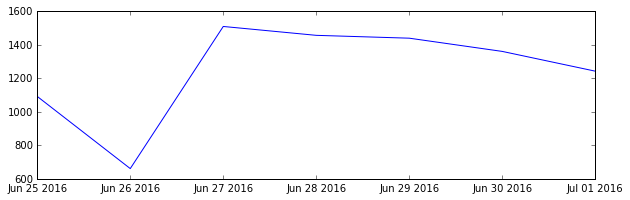

In [100]:
"""

NEED TO MAKE TITLE FOR THIS PLOT!!!

"""

for item in dailyEntryDict:
    datesAndCounts = dailyEntryDict[item]
    dates, counts = zip(*datesAndCounts)
    pprint.pprint (item)
    pprint.pprint (dailyEntryDict[item])
    plt.figure(figsize=(10,3))
    plt.plot(dates,counts)
    break # stops after one turnstile

## CHALLENGE 5
Consolidate turnstiles and create dictionary of daily entries ("allTurnstilesDict")

In [101]:
from operator import add

In [102]:
allTurnstilesDict = {}

for key,item in dailyEntryDict.items():
    stationName = (key[0], key[1], key[3])
    turnstileDates = [ x[0] for x in item ]
    turnstileCounts = [ x[1] for x in item ]  + [0]*(7-len(item))
    if stationName in allTurnstilesDict.keys():
        dates, counts = zip(*allTurnstilesDict[stationName])
        counts = list(counts) + [0]*(7-len(counts))
        counts = map(add, counts, turnstileCounts)
        allTurnstilesDict[stationName] = zip(dates, counts)
    else:
        allTurnstilesDict[stationName] = item

In [48]:
#  PRINTER (5 entries)

i = 0
for key,value in allTurnstilesDict.items():
    if i>4:
        break
    pprint.pprint (key)
    pprint.pprint (value)
    i += 1

('R137', 'R031', '34 ST-PENN STA')
[(datetime.date(2016, 6, 25), 0),
 (datetime.date(2016, 6, 26), 0),
 (datetime.date(2016, 6, 27), 3695),
 (datetime.date(2016, 6, 28), 3813),
 (datetime.date(2016, 6, 29), 3702),
 (datetime.date(2016, 6, 30), 3575),
 (datetime.date(2016, 7, 1), 2988)]
('B025', 'R150', 'AVENUE U')
[(datetime.date(2016, 6, 25), 4729),
 (datetime.date(2016, 6, 26), 4337),
 (datetime.date(2016, 6, 27), 6985),
 (datetime.date(2016, 6, 28), 7214),
 (datetime.date(2016, 6, 29), 7154),
 (datetime.date(2016, 6, 30), 7161),
 (datetime.date(2016, 7, 1), 6660)]
('R237', 'R046', 'GRD CNTRL-42 ST')
[(datetime.date(2016, 6, 25), 32),
 (datetime.date(2016, 6, 26), 0),
 (datetime.date(2016, 6, 27), 6230),
 (datetime.date(2016, 6, 28), 6529),
 (datetime.date(2016, 6, 29), 6451),
 (datetime.date(2016, 6, 30), 6098),
 (datetime.date(2016, 7, 1), 4336)]
('R232', 'R176', '33 ST')
[(datetime.date(2016, 6, 25), 3449),
 (datetime.date(2016, 6, 26), 3986),
 (datetime.date(2016, 6, 27), 7979),


## CHALLENGE 6
Combine ControlArea and Unit and create dictionary of daily entries per Station ("stationEntriesDict")

In [103]:
stationEntriesDict = {}

In [104]:
for key,item in allTurnstilesDict.items():
    if key[2] in allTurnstilesDict.keys():
        turnstileDates = [ x[0] for x in item ]
        turnstileCounts = [ x[1] for x in item ]  + [0]*(7-len(item))
        if key[2] in stationEntriesDict.keys():
            dates, counts = zip(*stationEntriesDict[key[2]])
            counts = list(counts) + [0]*(7-len(counts))
            counts = map(add, counts, turnstileCounts)
            allTurnstilesDict[stationName] = zip(dates, counts)
    else:
        stationEntriesDict[key[2]] = item

In [105]:
#  PRINTER (5 entries)

i = 0
for key,value in stationEntriesDict.items():
    if i>4:
        break
    pprint.pprint (key)
    pprint.pprint (value)
    i += 1

'CYPRESS AV'
[(datetime.date(2016, 6, 25), 1911),
 (datetime.date(2016, 6, 26), 1408),
 (datetime.date(2016, 6, 27), 3090),
 (datetime.date(2016, 6, 28), 3038),
 (datetime.date(2016, 6, 29), 2972),
 (datetime.date(2016, 6, 30), 3057),
 (datetime.date(2016, 7, 1), 2785)]
'5 AV/53 ST'
[(datetime.date(2016, 6, 25), 0),
 (datetime.date(2016, 6, 26), 0),
 (datetime.date(2016, 6, 27), 13762),
 (datetime.date(2016, 6, 28), 14829),
 (datetime.date(2016, 6, 29), 14547),
 (datetime.date(2016, 6, 30), 15077),
 (datetime.date(2016, 7, 1), 14976)]
'NEWKIRK PLAZA'
[(datetime.date(2016, 6, 25), 6059),
 (datetime.date(2016, 6, 26), 4977),
 (datetime.date(2016, 6, 27), 10462),
 (datetime.date(2016, 6, 28), 10505),
 (datetime.date(2016, 6, 29), 10218),
 (datetime.date(2016, 6, 30), 10448),
 (datetime.date(2016, 7, 1), 9286)]
'PATH WTC'
[(datetime.date(2016, 6, 25), 7729),
 (datetime.date(2016, 6, 26), 0),
 (datetime.date(2016, 6, 27), 0)]
'HARLEM 148 ST'
[(datetime.date(2016, 6, 25), 2302),
 (datetime.d

## CHALLENGE 7
Plot the time series for a single station

'CYPRESS AV'
[(datetime.date(2016, 6, 25), 1911),
 (datetime.date(2016, 6, 26), 1408),
 (datetime.date(2016, 6, 27), 3090),
 (datetime.date(2016, 6, 28), 3038),
 (datetime.date(2016, 6, 29), 2972),
 (datetime.date(2016, 6, 30), 3057),
 (datetime.date(2016, 7, 1), 2785)]


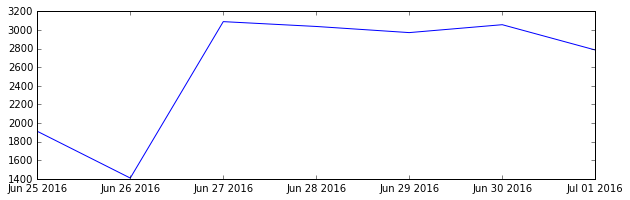

In [106]:
"""

NEED A TITLE FOR THIS PLOT

"""

for station in stationEntriesDict:
    datesAndCounts = stationEntriesDict[station]
    dates, counts = zip(*datesAndCounts)
    pprint.pprint (station)
    pprint.pprint (stationEntriesDict[station])
    plt.figure(figsize=(10,3))
    plt.plot(dates,counts)
    break # stops after one turnstile

## CHALLENGE 8
Create a dictionary of stations containing a list of a week's worth of entries, by day ("weeklyStationDict")

In [107]:
weeklyStationDict = {}

In [108]:
for station in stationEntriesDict:
    weeklyStationDict[station] = [ x[1] for x in stationEntriesDict[station] ]

pprint.pprint (weeklyStationDict)

{'1 AV': [7869, 6268, 7076, 7312, 7064, 6846, 7114],
 '103 ST': [2282, 1543, 4443, 4437, 4533, 4535, 4093],
 '103 ST-CORONA': [13834, 11012, 18788, 19001, 18772, 18799, 18461],
 '104 ST': [1540, 1181, 2546, 2649, 2467, 2485, 2299],
 '110 ST': [5334, 4466, 7827, 8002, 7797, 7949, 7371],
 '111 ST': [29, 16, 898, 974, 918, 925, 792],
 '116 ST': [6629, 5688, 9577, 9734, 9395, 9542, 8892],
 '116 ST-COLUMBIA': [6004, 5905, 13811, 9267, 14811, 14300, 11908],
 '121 ST': [1599, 1346, 2361, 2299, 2336, 2380, 2202],
 '125 ST': [15257, 12664, 26552, 26297, 26528, 26458, 24056],
 '135 ST': [1, 0, 2054, 2165, 2087, 2229, 1724],
 '137 ST CITY COL': [1480, 1235, 2405, 2360, 2280, 2207, 1877],
 '138/GRAND CONC': [1661, 1141, 3247, 3353, 3185, 3235, 3115],
 '14 ST': [1899, 2755, 3452, 3462, 3649, 3535, 3132],
 '14 ST-UNION SQ': [11148, 11352, 13556, 14193, 14163, 14058, 14020],
 '145 ST': [4940, 4236, 6404, 6578, 6710, 6660, 6162],
 '149/GRAND CONC': [1841, 1377, 3160, 3436, 3204, 3206, 2336],
 '14TH ST

In [111]:
turnstileDict = {}
with open("turnstile_160611.txt", "r") as csvfile:
    reader = csv.reader(csvfile)
    next(reader, None)
    for item in reader:
        turnstileDict.setdefault(tuple(item[:4]),[]).append(item[5:])

In [112]:
for key in turnstileDict.keys():
    newList = [[datetime.datetime.strptime(str(x + " " + y), "%m/%d/%Y %H:%M:%S"),int(z)] for [_,x,y,_,z,_] in turnstileDict[key]]
    timeDict[key] = newList

In [113]:
for key in timeDict:
    dailyEntryDict[key] = []
    dateList = []
    for x in timeDict[key]:
        if dateList == []:
            dateList.append(x[0].date())
            
        if x[0].date() not in dateList:
            dailyEntryDict[key].append([dateList[0], max(dateList[1:]) - min(dateList[1:])])
            dateList = [x[0].date(), x[1]]
        else:
            dateList.append(x[1])
            
        if timeDict[key].index(x) == len(timeDict[key])-1:
            dailyEntryDict[key].append([dateList[0], max(dateList[1:]) - min(dateList[1:])])

In [114]:
allTurnstilesDict = {}

for key,item in dailyEntryDict.items():
    stationName = (key[0], key[1], key[3])
    turnstileDates = [ x[0] for x in item ]
    turnstileCounts = [ x[1] for x in item ]  + [0]*(7-len(item))
    if stationName in allTurnstilesDict.keys():
        dates, counts = zip(*allTurnstilesDict[stationName])
        counts = list(counts) + [0]*(7-len(counts))
        counts = map(add, counts, turnstileCounts)
        allTurnstilesDict[stationName] = zip(dates, counts)
    else:
        allTurnstilesDict[stationName] = item

In [84]:
#  PRINTER (5 entries)

i = 0
for key,value in dailyEntryDict.items():
    if i>4:
        break
    pprint.pprint (key)
    pprint.pprint (value)
    i += 1

('N134', 'R385', '00-00-00', 'ROCKAWAY BLVD')
[[datetime.date(2016, 6, 4), 744],
 [datetime.date(2016, 6, 5), 531],
 [datetime.date(2016, 6, 6), 1365],
 [datetime.date(2016, 6, 7), 1547],
 [datetime.date(2016, 6, 8), 1423],
 [datetime.date(2016, 6, 9), 1360],
 [datetime.date(2016, 6, 10), 1338]]
('R190', 'R038', '00-00-02', '215 ST')
[[datetime.date(2016, 6, 4), 628],
 [datetime.date(2016, 6, 5), 543],
 [datetime.date(2016, 6, 6), 652],
 [datetime.date(2016, 6, 7), 651],
 [datetime.date(2016, 6, 8), 674],
 [datetime.date(2016, 6, 9), 758],
 [datetime.date(2016, 6, 10), 717]]
('PTH08', 'R540', '00-01-06', 'PATH WTC')
[[datetime.date(2016, 6, 4), 104],
 [datetime.date(2016, 6, 5), 50],
 [datetime.date(2016, 6, 6), 626],
 [datetime.date(2016, 6, 7), 658],
 [datetime.date(2016, 6, 8), 633],
 [datetime.date(2016, 6, 9), 626],
 [datetime.date(2016, 6, 10), 559]]
('R159', 'R164', '01-06-00', '66 ST-LINCOLN')
[[datetime.date(2016, 6, 4), 37],
 [datetime.date(2016, 6, 5), 53],
 [datetime.date(2

In [115]:
stationEntriesDict = {}
for key,item in allTurnstilesDict.items():
    if key[2] in allTurnstilesDict.keys():
        turnstileDates = [ x[0] for x in item ]
        turnstileCounts = [ x[1] for x in item ]  + [0]*(7-len(item))
        if key[2] in stationEntriesDict.keys():
            dates, counts = zip(*stationEntriesDict[key[2]])
            counts = list(counts) + [0]*(7-len(counts))
            counts = map(add, counts, turnstileCounts)
            allTurnstilesDict[stationName] = zip(dates, counts)
    else:
        stationEntriesDict[key[2]] = item

In [119]:
#  PRINTER (5 entries)

i = 0
for key,value in stationEntriesDict.items():
    if i>4:
        break
    pprint.pprint (key)
    pprint.pprint (value)
    i += 1

'CYPRESS AV'
[(datetime.date(2016, 6, 4), 1834),
 (datetime.date(2016, 6, 5), 1239),
 (datetime.date(2016, 6, 6), 3242),
 (datetime.date(2016, 6, 7), 3339),
 (datetime.date(2016, 6, 8), 3235),
 (datetime.date(2016, 6, 9), 3224),
 (datetime.date(2016, 6, 10), 3333)]
'5 AV/53 ST'
[(datetime.date(2016, 6, 4), 0),
 (datetime.date(2016, 6, 5), 0),
 (datetime.date(2016, 6, 6), 13507),
 (datetime.date(2016, 6, 7), 14414),
 (datetime.date(2016, 6, 8), 15526),
 (datetime.date(2016, 6, 9), 15014),
 (datetime.date(2016, 6, 10), 15021)]
'NEWKIRK PLAZA'
[(datetime.date(2016, 6, 4), 5977),
 (datetime.date(2016, 6, 5), 4295),
 (datetime.date(2016, 6, 6), 10635),
 (datetime.date(2016, 6, 7), 11234),
 (datetime.date(2016, 6, 8), 10908),
 (datetime.date(2016, 6, 9), 10716),
 (datetime.date(2016, 6, 10), 10989)]
'PATH WTC'
[(datetime.date(2016, 6, 4), 10195),
 (datetime.date(2016, 6, 5), 7015),
 (datetime.date(2016, 6, 6), 35772),
 (datetime.date(2016, 6, 7), 36016),
 (datetime.date(2016, 6, 8), 35864),


In [118]:
for station in stationEntriesDict:
    weeklyStationDict[station].append([ x[1] for x in stationEntriesDict[station] ])

pprint.pprint (weeklyStationDict)

{'1 AV': [7869,
          6268,
          7076,
          7312,
          7064,
          6846,
          7114,
          [7880, 5933, 8131, 8170, 8049, 7510, 8678],
          [7880, 5933, 8131, 8170, 8049, 7510, 8678],
          [7880, 5933, 8131, 8170, 8049, 7510, 8678]],
 '103 ST': [2282,
            1543,
            4443,
            4437,
            4533,
            4535,
            4093,
            [2041, 1226, 4797, 4829, 5027, 4878, 4970],
            [2041, 1226, 4797, 4829, 5027, 4878, 4970],
            [2041, 1226, 4797, 4829, 5027, 4878, 4970]],
 '103 ST-CORONA': [13834,
                   11012,
                   18788,
                   19001,
                   18772,
                   18799,
                   18461,
                   [10161, 6775, 19332, 19477, 19424, 19285, 19826],
                   [10161, 6775, 19332, 19477, 19424, 19285, 19826],
                   [10161, 6775, 19332, 19477, 19424, 19285, 19826]],
 '104 ST': [1540,
            1181,
    